# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import pandas as pd
import quandl
import statsmodels.tsa.stattools as ts

# Training Data

## Treasury Rates

In [2]:
# https://www.quandl.com/data/FRED/GS10-10-Year-Treasury-Constant-Maturity-Rate
treasury = quandl.get("FRED/GS10", start_date='1981-01-01', end_date='2018-01-01', api_key='enter_api_key')
treasury

,Value
Date,
1981-01-01,12.57
1981-02-01,13.19
1981-03-01,13.12
1981-04-01,13.68
1981-05-01,14.10
...,...
2017-09-01,2.20
2017-10-01,2.36
2017-11-01,2.35


In [3]:
treasuryvalues=treasury['Value']

In [4]:
treasurynp=np.array(treasuryvalues)

## Copper

In [5]:
# https://www.quandl.com/data/FRED/WPUSI019011-Producer-Price-Index-by-Commodity-for-Special-Indexes-Copper-and-Copper-Products
copper = quandl.get("FRED/WPUSI019011", start_date='1981-01-01', end_date='2018-01-01', api_key='enter_api_key')

In [6]:
coppervalues=copper['Value']

In [7]:
coppernp=np.array(coppervalues)

In [8]:
copperlog=np.log(coppernp)

# Validation Data

## Treasuries

In [9]:
treasuryval = quandl.get("FRED/GS10", start_date='2018-02-01', end_date='2020-03-01', api_key='enter_api_key')

In [10]:
treasuryval=treasuryval['Value']

In [11]:
treasuryvalnp=np.array(treasuryval)

## Copper

In [12]:
copperval = quandl.get("FRED/WPUSI019011", start_date='2018-02-01', end_date='2020-03-01', api_key='enter_api_key')

In [13]:
copperval=copperval['Value']

In [14]:
coppervalnp=np.array(copperval)
coppervallog=np.log(coppervalnp)

# Cointegration

## Treasury vs. Copper

In [15]:
coin_result_1 = ts.coint(treasurynp, copperlog)
coin_result_1

(-3.118624703597714,
 0.08462298746786284,
 array([-3.92127651, -3.3499261 , -3.05401605]))

In [16]:
coin_result_2 = ts.coint(treasuryvalnp, coppervallog)
coin_result_2

(-1.0804685775377714,
 0.8864921628087918,
 array([-4.3881592, -3.5914508, -3.21845  ]))

# Cross-Correlation

In [17]:
x=treasurynp
y=copperlog

In [18]:
#Dickey-Fuller Tests
xdf = ts.adfuller(x, 1)
ydf = ts.adfuller(y, 1)

In [19]:
xdf

(-2.0945376531502222,
 0.24671670392423872,
 1,
 443,
 {'1%': -3.4451978474132234,
  '5%': -2.8680864144212057,
  '10%': -2.5702569996789792},
 120.94064020785993)

In [20]:
ydf

(-1.0053282666129884,
 0.7513159807741557,
 1,
 443,
 {'1%': -3.4451978474132234,
  '5%': -2.8680864144212057,
  '10%': -2.5702569996789792},
 -1659.1722098914383)

In [21]:
x=np.array(x)

In [22]:
#First-Differencing
diffx=np.diff(x, n=1)

In [23]:
diffy=np.diff(y, n=1)

In [24]:
resultx = ts.adfuller(diffx, 1)
resultx

(-14.732190138739616,
 2.6490867947962038e-27,
 1,
 442,
 {'1%': -3.445231637930579,
  '5%': -2.8681012763264233,
  '10%': -2.5702649212751583},
 114.63351121774383)

In [25]:
resulty = ts.adfuller(diffy, 1)
resulty

(-13.712364663595924,
 1.230847165082792e-25,
 0,
 443,
 {'1%': -3.4451978474132234,
  '5%': -2.8680864144212057,
  '10%': -2.5702569996789792},
 -1655.4032666104895)

In [26]:
# Calculate correlations
cc1 = np.correlate(diffx - diffx.mean(), diffy - diffy.mean())[0] # Remove means
cc1
cc1 /= (len(diffx) * diffx.std() * diffy.std()) #Normalise by number of points and product of standard deviations
cc1
cc2 = np.corrcoef(diffx, diffy)[0, 1]
cc2
print(cc1, cc2)

0.16344286819856327 0.1634428681985633


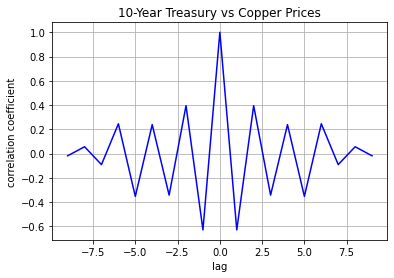

In [27]:
# Generating lags
nx = 10
nx
x = np.random.randn(nx) # normal RV
x
lags = np.arange(-nx + 1, nx) # so last value is nx - 1
lags
xdm = x - x.mean() # Remove sample mean
xdm

autocorr_xdm = np.correlate(xdm, xdm, mode='full')
# Normalize by the zero-lag value:
autocorr_xdm /= autocorr_xdm[nx - 1]

fig, ax = plt.subplots()
ax.plot(lags, autocorr_xdm, 'b')
ax.set_xlabel('lag')
ax.set_ylabel('correlation coefficient')
ax.grid(True)
plt.title("10-Year Treasury vs Copper Prices")
plt.show()

# ARIMA

## U.S. Inflation Forecasts

In [28]:
usinf = quandl.get("FRED/FPCPITOTLZGUSA", start_date='1960-01-01', end_date='2019-01-01', api_key='enter_api_key')
usinf

,Value
Date,
1960-01-01,1.457976
1961-01-01,1.070724
1962-01-01,1.198773
1963-01-01,1.239669
1964-01-01,1.278912
1965-01-01,1.585169
1966-01-01,3.015075
1967-01-01,2.772786
1968-01-01,4.271796


In [29]:
train=usinf[1:54]
val=usinf[55:60]

In [30]:
from pyramid.arima import auto_arima
Arima_model=auto_arima(train, start_p=0, start_q=0, max_p=10, max_q=10, start_P=0, start_Q=0, max_P=10, max_Q=10, m=52, seasonal=False, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)

/home/michael/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/michael/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/home/michael/.local/lib/python3.6/site-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is du

Fit ARIMA: order=(0, 1, 0); AIC=209.234, BIC=213.137, Fit time=0.002 seconds
Fit ARIMA: order=(1, 1, 0); AIC=209.761, BIC=215.615, Fit time=0.012 seconds
Fit ARIMA: order=(0, 1, 1); AIC=207.047, BIC=212.901, Fit time=0.011 seconds
Fit ARIMA: order=(1, 1, 1); AIC=206.228, BIC=214.033, Fit time=0.041 seconds
Fit ARIMA: order=(1, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2); AIC=204.854, BIC=216.561, Fit time=0.075 seconds


/home/michael/.local/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 2); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(3, 1, 2); AIC=205.380, BIC=219.038, Fit time=0.089 seconds
Fit ARIMA: order=(2, 1, 1); AIC=202.858, BIC=212.614, Fit time=0.034 seconds
Fit ARIMA: order=(3, 1, 1); AIC=204.858, BIC=216.565, Fit time=0.056 seconds
Fit ARIMA: order=(2, 1, 0); AIC=202.206, BIC=210.011, Fit time=0.018 seconds
Fit ARIMA: order=(3, 1, 0); AIC=203.353, BIC=213.109, Fit time=0.029 seconds
Total fit time: 0.377 seconds


In [31]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   52
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -97.103
Method:                       css-mle   S.D. of innovations              1.560
Date:                Fri, 15 May 2020   AIC                            202.206
Time:                        12:21:49   BIC                            210.011
Sample:                             1   HQIC                           205.199
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0162      0.187      0.087      0.931      -0.350       0.382
ar.L1.D.y      0.2334      0.126      1.859      0.063      -0.013       0.480
ar.L2.D.y     -0.4033      0.123     -3.267      0.001      -0.645      -0.161
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.2893           -1.5478j            1.5746           -0.2206
AR.2            0.2893           +1.5478j            1.5746            0.2206
-----------------------------------------------------------------------------
"""

In [32]:
prediction=pd.DataFrame(Arima_model.predict(n_periods=5), index=val.index)
prediction.columns = ['Predicted_Inflation']
predictions=prediction['Predicted_Inflation']

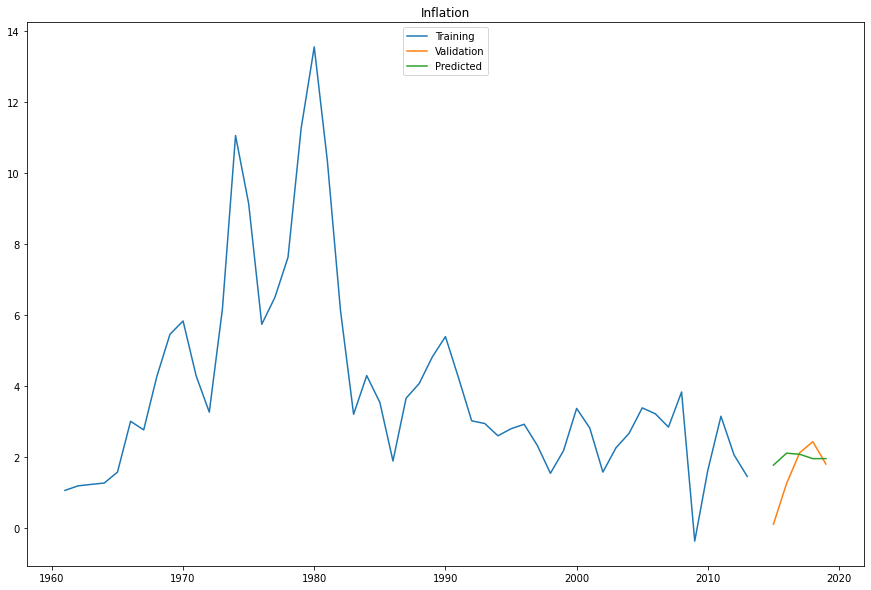

In [33]:
plt.figure(figsize=(15,10))
plt.plot(train, label='Training')
plt.plot(val, label='Validation')
plt.plot(prediction, label='Predicted')
plt.legend(loc = 'upper center')
plt.title("Inflation")
plt.show()

In [34]:
import math
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(val, predictions)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.866269


In [35]:
val

,Value
Date,
2015-01-01,0.118627
2016-01-01,1.261583
2017-01-01,2.130110
2018-01-01,2.442583
2019-01-01,1.812210


In [36]:
predictions

Date
2015-01-01    1.781247
2016-01-01    2.117794
2017-01-01    2.087625
2018-01-01    1.963748
2019-01-01    1.965902
Name: Predicted_Inflation, dtype: float64

In [37]:
future=pd.DataFrame(Arima_model.predict(n_periods=20))

In [38]:
future=future[0:20]
future

,0
0,1.781247
1,2.117794
2,2.087625
3,1.963748
4,1.965902
5,2.035262
6,2.069479
7,2.068388
8,2.073231
9,2.093699


Text(0.5, 1.0, 'ARIMA Forecast')

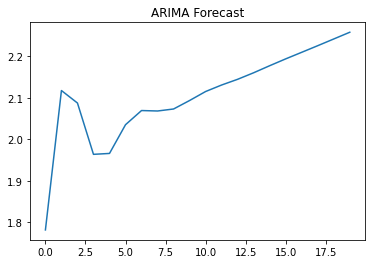

In [39]:
plt.plot(future)
plt.title("ARIMA Forecast")

## US 10-Year Treasury

In [40]:
Arima_model_two=auto_arima(treasury, start_p=0, start_q=0, max_p=10, max_q=10, start_P=0, start_Q=0, max_P=10, max_Q=10, m=52, seasonal=False, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)
prediction=pd.DataFrame(Arima_model.predict(n_periods=26), index=treasuryval.index)
prediction.columns = ['Predicted_Treasury_Rate']
predictions_treasury=prediction['Predicted_Treasury_Rate']

Fit ARIMA: order=(0, 1, 0); AIC=162.550, BIC=170.742, Fit time=0.007 seconds
Fit ARIMA: order=(1, 1, 0); AIC=129.653, BIC=141.940, Fit time=0.018 seconds
Fit ARIMA: order=(0, 1, 1); AIC=117.501, BIC=129.788, Fit time=0.059 seconds
Fit ARIMA: order=(1, 1, 1); AIC=115.158, BIC=131.541, Fit time=0.044 seconds
Fit ARIMA: order=(1, 1, 2); AIC=117.141, BIC=137.620, Fit time=0.092 seconds
Fit ARIMA: order=(2, 1, 2); AIC=112.047, BIC=136.622, Fit time=0.328 seconds
Fit ARIMA: order=(3, 1, 2); AIC=121.120, BIC=149.790, Fit time=0.324 seconds
Fit ARIMA: order=(2, 1, 1); AIC=117.142, BIC=137.621, Fit time=0.081 seconds
Fit ARIMA: order=(2, 1, 3); AIC=nan, BIC=nan, Fit time=nan seconds


/home/michael/.local/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 3); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(3, 1, 3); AIC=116.439, BIC=149.205, Fit time=0.500 seconds
Total fit time: 1.469 seconds


In [41]:
Arima_model_two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  444
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -50.024
Method:                       css-mle   S.D. of innovations              0.270
Date:                Fri, 15 May 2020   AIC                            112.047
Time:                        12:21:51   BIC                            136.622
Sample:                             1   HQIC                           121.739
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0231      0.003     -9.047      0.000      -0.028      -0.018
ar.L1.D.y      0.7428      0.116      6.382      0.000       0.515       0.971
ar.L2.D.y      0.2037      0.115      1.770      0.077      -0.022       0.429
ma.L1.D.y     -0.4257      0.099     -4.305      0.000      -0.620      -0.232
ma.L2.D.y     -0.5743      0.099     -5.828      0.000      -0.767      -0.381
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0461           +0.0000j            1.0461            0.0000
AR.2           -4.6924           +0.0000j            4.6924            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.7413           +0.0000j            1.7413            0.5000
-----------------------------------------------------------------------------
"""

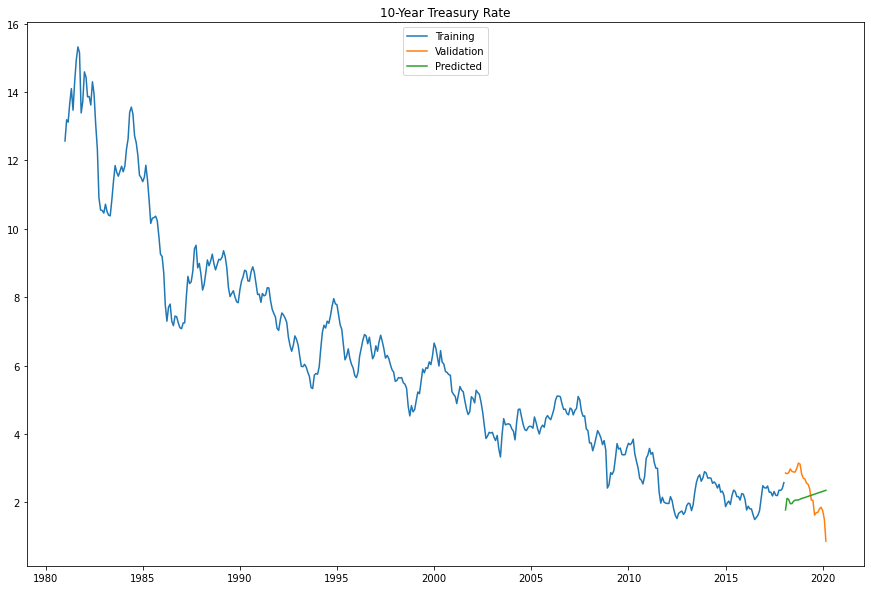

In [42]:
plt.figure(figsize=(15,10))
plt.plot(treasury, label='Training')
plt.plot(treasuryval, label='Validation')
plt.plot(predictions_treasury, label='Predicted')
plt.legend(loc = 'upper center')
plt.title('10-Year Treasury Rate')
plt.show()

In [43]:
mse = mean_squared_error(treasuryval, predictions_treasury)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.756603


In [44]:
futuretreasury=pd.DataFrame(Arima_model_two.predict(n_periods=20))

In [45]:
futuretreasury=futuretreasury[0:20]
futuretreasury

,0
0,2.556287
1,2.451584
2,2.367743
3,2.282899
4,2.201561
5,2.122621
6,2.046179
7,1.972079
8,1.900228
9,1.830526


Text(0.5, 1.0, 'ARIMA Forecast')

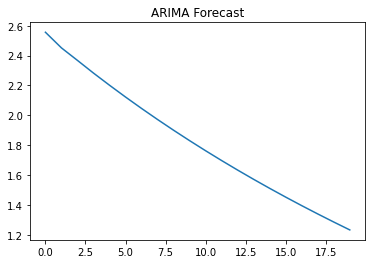

In [46]:
plt.plot(futuretreasury)
plt.title("ARIMA Forecast")

# Recent Copper Prices

In [47]:
copper_new = quandl.get("FRED/WPUSI019011", start_date='2018-02-01', end_date='2020-05-01', api_key='enter_api_key')

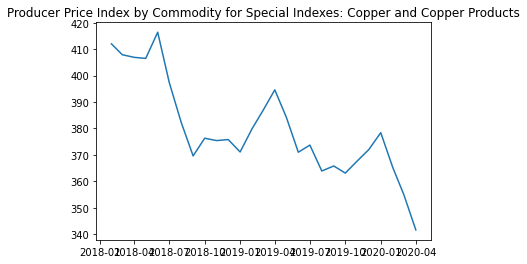

In [48]:
plt.plot(copper_new)
plt.title("Producer Price Index by Commodity for Special Indexes: Copper and Copper Products")
plt.show()

# Recent 10-Year US Treasury

In [49]:
treasury_new = quandl.get("FRED/GS10", start_date='2018-02-01', end_date='2020-05-01', api_key='enter_api_key')

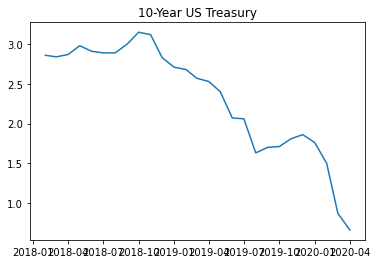

In [50]:
plt.plot(treasury_new)
plt.title("10-Year US Treasury")
plt.show()

# Long-Run Graphs

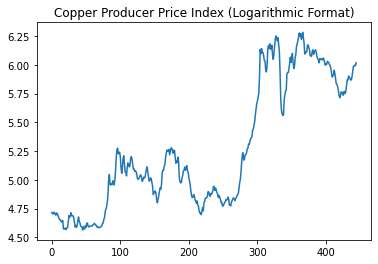

In [51]:
plt.plot(copperlog)
plt.title("Copper Producer Price Index (Logarithmic Format)")
plt.show()

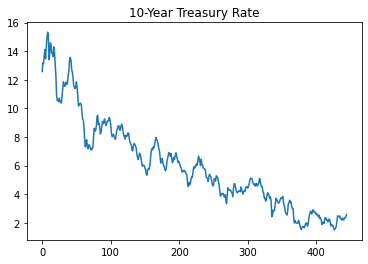

In [52]:
plt.plot(treasurynp)
plt.title("10-Year Treasury Rate")
plt.show()

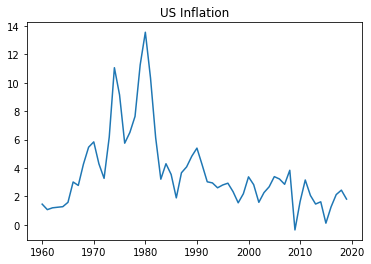

In [53]:
plt.plot(usinf)
plt.title("US Inflation")
plt.show()